In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Rectangle
from astropy.visualization import AsymmetricPercentileInterval, ZScaleInterval

import numpy as np
import os.path
import cv2

from astropy.io import fits
from astropy.wcs import WCS

In [2]:
filename = 'images/SPLUS-s27s34_R_swp.fits'
hdu = fits.open(filename)[0]
data = hdu.data
header = hdu.header
wcs = WCS(header)

zscale = ZScaleInterval(contrast=0.35) 
zdata = zscale(data)

In [3]:
img = np.asarray ( zdata, dtype = np.uint8 ) 

thresh = cv2.threshold ( img, 0, 255, cv2.THRESH_BINARY)[1]

# get bounding box coordinates from largest external contour
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=len)#cv2.contourArea)
x, y, w, h = cv2.boundingRect(big_contour)
print (x, y, w, h)

mask = cv2.rectangle(data, (x, y), (x + w, y + h), (0, 0, 255), 0)

919 821 9359 9351


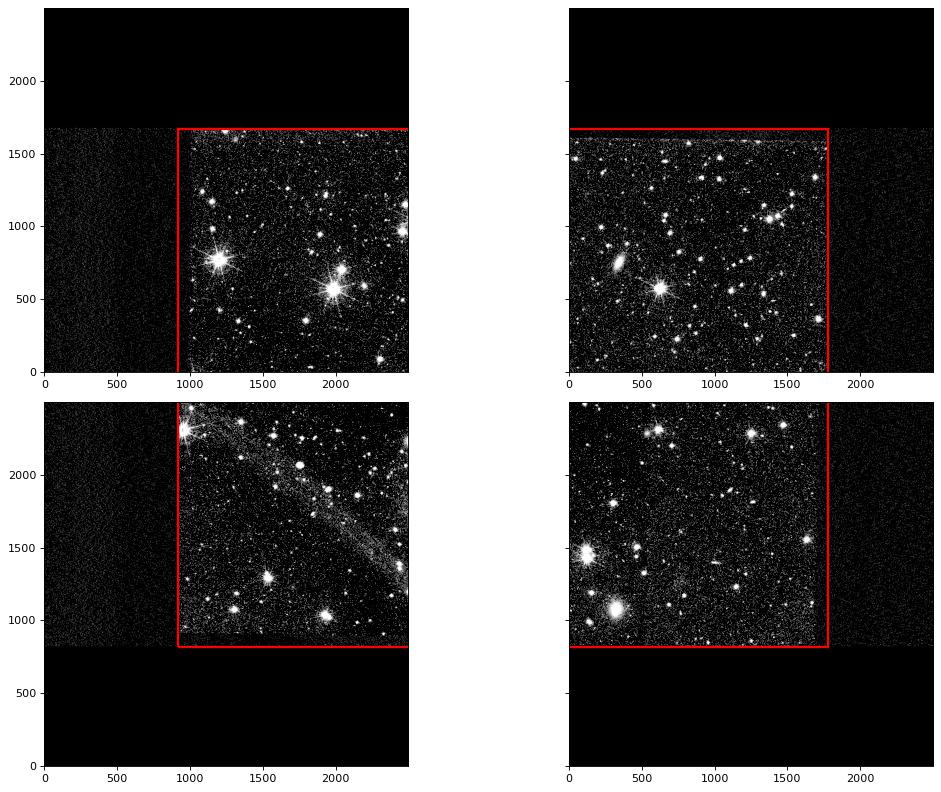

In [4]:
vmin, vmax = AsymmetricPercentileInterval ( lower_percentile = 50, upper_percentile = 95 ).get_limits ( zdata )
args = dict( origin = 'lower',  cmap='gray', norm = colors.LogNorm(vmin = vmin, vmax = vmax, clip = True) )

fig, ((ax0, ax1),  (ax2, ax3)) = plt.subplots ( ncols = 2, nrows = 2, figsize = (15, 10), dpi = 80, sharey = True )
for a, b, c, d, ax in [[8500, 11000, 0, 2500,ax0], [8500, 11000, 8500, 11000, ax1], 
                       [0, 2500, 0, 2500, ax2], [0, 2500, 8500, 11000, ax3]]:
    ax.imshow ( zdata[a:b, c:d], **args )
    if (ax == ax1) | (ax == ax2):
        ax.add_patch ( Rectangle( (x-a, y-c), w, h, edgecolor = 'red', facecolor = 'none', lw = 2) )
    elif ax == ax3:
        ax.add_patch ( Rectangle( (x-a-8500, y-c+8500), w, h, edgecolor = 'red', facecolor = 'none', lw = 2) )
    elif ax == ax0:
        ax.add_patch ( Rectangle( (x-a+8500, y-c-8500), w, h, edgecolor = 'red', facecolor = 'none', lw = 2) )
plt.tight_layout()
plt.show()

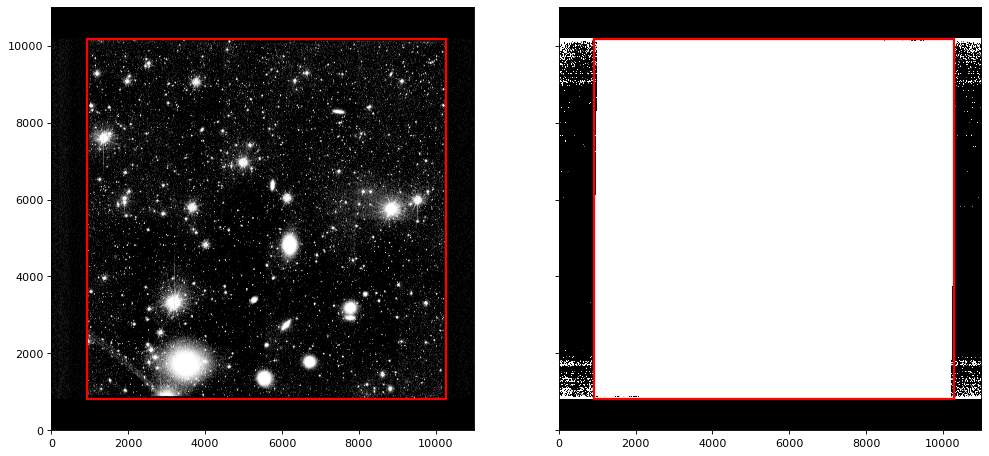

In [8]:
fig, (ax0, ax1) = plt.subplots ( ncols = 2, nrows = 1, figsize = (15, 10), dpi = 80, sharey = True )
ax0.imshow ( zdata, **args )
ax1.imshow ( thresh, **args )
for ax in [ ax0, ax1 ]:
    ax.add_patch ( Rectangle( (x, y), w, h, edgecolor = 'red', facecolor = 'none', lw = 2) )
plt.show()  

In [25]:
img = np.asarray ( zdata, dtype = np.uint8 ) 
gaussian = cv2.GaussianBlur ( img, (5, 5), cv2.BORDER_DEFAULT )
edges = cv2.Canny ( gaussian, 0, 1 )

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=len)#cv2.contourArea)
x, y, w, h = cv2.boundingRect(big_contour)
print (x, y, w, h)

919 822 9357 9349


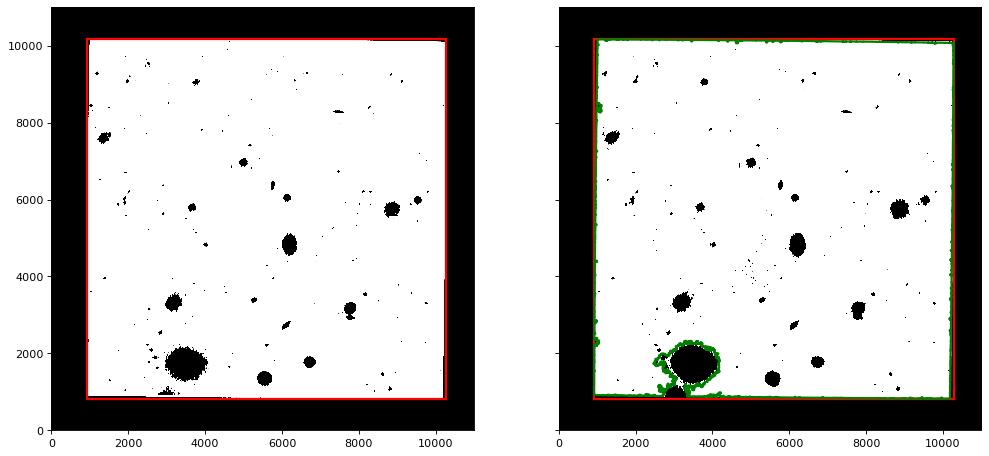

In [31]:
fig, (ax0, ax1) = plt.subplots ( ncols = 2, nrows = 1, figsize = (15, 10), dpi = 80, sharey = True )
ax0.imshow ( edges, **args )
ax1.imshow ( mask, **args )
for ax in [ ax0, ax1 ]:
    ax.add_patch ( Rectangle( (x, y), w, h, edgecolor = 'red', facecolor = 'none', lw = 2) )
    
xx, yy = big_contour[:, 0, 0], big_contour[:, 0, 1]
ax1.plot(xx, yy, linewidth=2, color='green')
plt.show()  

In [29]:
thresh = cv2.threshold ( mask, 0, 255, cv2.THRESH_BINARY)[1]

# get bounding box coordinates from largest external contour
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=len)#cv2.contourArea)
x, y, w, h = cv2.boundingRect(big_contour)
print (x, y, w, h)

919 822 9357 9349


In [30]:
big_contour

array([[[9662,  822]],

       [[9662,  823]],

       [[9661,  824]],

       ...,

       [[9674,  823]],

       [[9673,  823]],

       [[9672,  822]]], dtype=int32)

In [57]:
img1 = np.asarray ( zdata, dtype = np.uint8 ) 
thresh1 = cv2.threshold ( img1, 0.2, 0., cv2.THRESH_BINARY )[1]
    
# apply open morphology
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel1)

# get bounding box coordinates from largest external contour
#contours1, hierarchy = cv2.findContours(morph1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours1 = cv2.findContours(morph1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours1 = contours1[0] if len(contours1) == 2 else contours1[1]
big_contour1 = max(contours1, key=len)#cv2.contourArea)
x1, y1, w1, h1 = cv2.boundingRect(big_contour1)
print (x1, y1, w1, h1)

mask1 = cv2.rectangle(data, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 255), 0)

2964 1272 1127 901


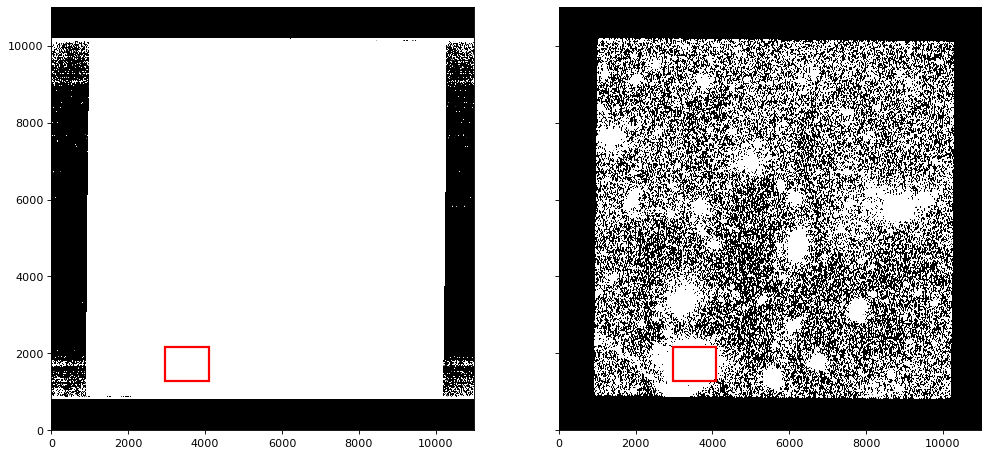

In [58]:
fig, (ax0, ax1) = plt.subplots ( ncols = 2, nrows = 1, figsize = (15, 10), dpi = 80, sharey = True )
ax0.imshow ( thresh1, **args )
ax1.imshow ( morph1, **args )
for ax in [ ax0, ax1 ]:
    ax.add_patch ( Rectangle( (x1, y1), w1, h1, edgecolor = 'red', facecolor = 'none', lw = 2) )
    
plt.show()  

In [11]:
img1 = cv2.imread ( 'images/SPLUS-s27s34_R_swp.png', cv2.IMREAD_GRAYSCALE)

gaussian = cv2.GaussianBlur ( img1, (5, 5), cv2.BORDER_DEFAULT )
edges = cv2.Canny(gaussian, 0, 255  )

contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key = len)
   
#contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#contour = max(contours, key = len)

#la imagen tiene un valor promedio de 0.0187388 y en la parte central de 0.000250314. Que valores deberia modificar del codigo anterior?



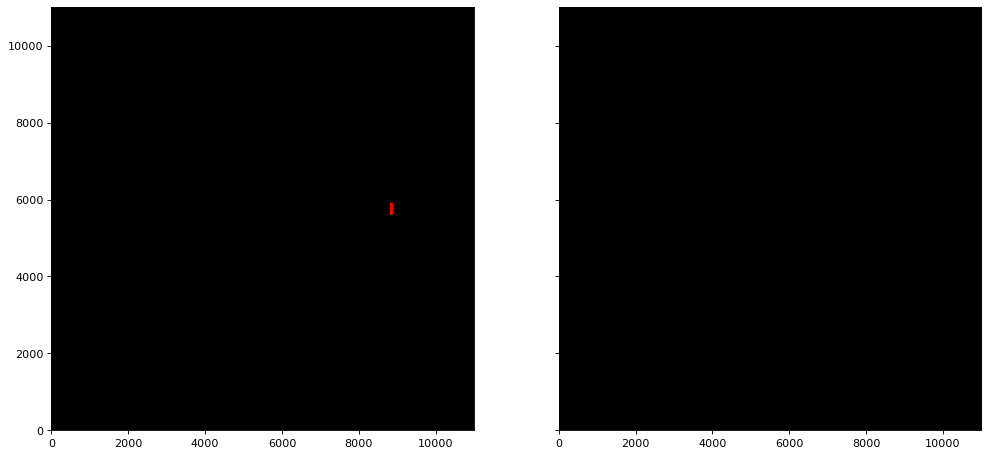

In [24]:
vmin, vmax = AsymmetricPercentileInterval ( lower_percentile = 50, upper_percentile = 95 ).get_limits ( img1 )
args = dict( origin = 'lower',  cmap='gray', norm = colors.LogNorm(vmin = vmin, vmax = vmax, clip = True) )

fig, (ax0,ax1) = plt.subplots ( ncols = 2, nrows = 1, figsize = (15, 10), dpi = 80, sharey = True )
ax0.imshow ( zdata, **args )
ax0.plot(x, y, linewidth=2, color='red')

ax1.imshow ( edges, **args )
plt.show()  

In [37]:
filename = 'images/SPLUS-s27s34_R_swp.fits'
hdu = fits.open(filename)[0]
data = hdu.data
header = hdu.header
wcs = WCS(header)
data1[data == 0] = np.nan

zscale = ZScaleInterval(contrast=0.35) 
vmin, vmax = AsymmetricPercentileInterval ( lower_percentile = 50, upper_percentile = 95 ).get_limits ( zscale(data1) )
plt.imsave ( fname = 'images/SPLUS-s27s34_R_swp.png', arr = zscale(data1), cmap = 'gray_r', 
            vmin = vmin, vmax = vmax, origin = 'lower', format = 'png' )

#img = np.asarray ( zdata, dtype = np.uint8 ) 
img1 = cv2.imread ( 'images/SPLUS-s27s34_R_swp.png', cv2.IMREAD_GRAYSCALE)

print(img1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
gaussian = cv2.GaussianBlur ( img1, (5, 5), cv2.BORDER_DEFAULT )
edges = cv2.Canny(gaussian, 0, 255  )

contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key = len)

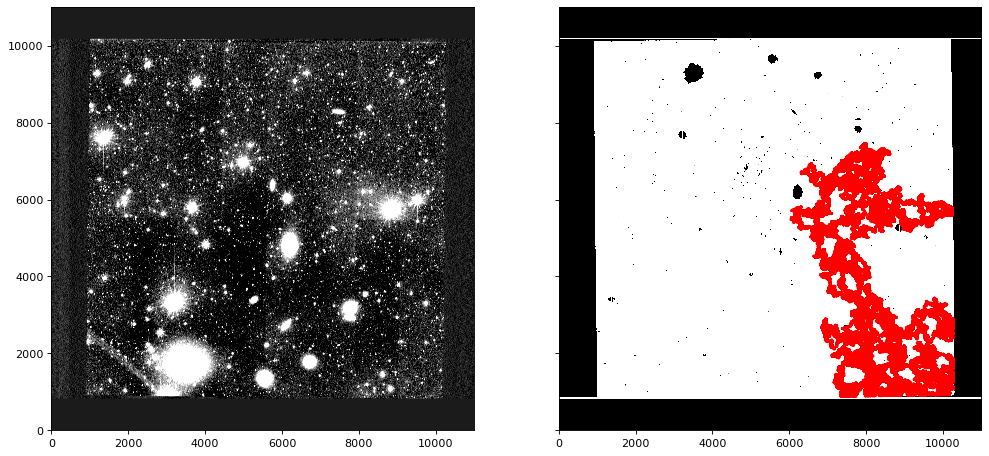

In [39]:
args = dict( origin = 'lower',  cmap='gray', norm = colors.LogNorm(vmin = vmin, vmax = vmax, clip = True) )
fig, (ax0,ax1) = plt.subplots ( ncols = 2, nrows = 1, figsize = (15, 10), dpi = 80, sharey = True )
ax0.imshow ( zdata, **args )
ax1.imshow ( edges, **args )
x, y = contour[:, 0, 0], contour[:, 0, 1]
ax1.plot(x, y, linewidth=2, color='red')
plt.show()  

In [115]:
v=5000
n=15
new_section1 = blur[:,:][v,:] 
mean_init = np.nanmean(new_section1[5000:5000+n])
std_init = np.nanstd(new_section1[5000:5000+n])
print (mean_init, std_init)

0.4666666666666667 0.49888765156985887


In [118]:
v=5000
n=50
new_section1 = blur[:,:][v,:] 
mean_init = np.nanmean(new_section1[0:n])
std_init = np.nanstd(new_section1[0:n])
print (mean_init, std_init)

0.0 0.0


In [128]:
blur.ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [76]:
def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV)
    img_blur = cv2.GaussianBlur(thresh, (3, 3), 1)
    img_canny = cv2.Canny(img_blur, 0, 0)
    kernel = np.ones((5, 5))
    img_dilate = cv2.dilate(img_canny, kernel, iterations=1)
    return cv2.erode(img_dilate, kernel, iterations=1)

def get_contours(img):
    contours, hierarchies = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnt = max(contours, key=len)
    cv2.drawContours(img, [cnt], -1, (0, 255, 0), 30)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 30)
    print (x, y, w, h)

img = cv2.imread('images/SPLUS-s27s34_R_swp.png')
#get_contours(img)

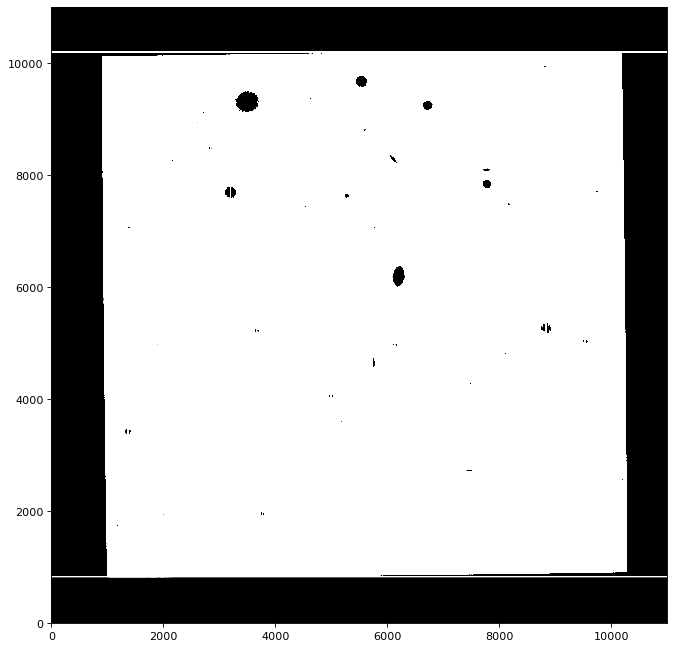

In [77]:
test = process(img)
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (15, 10), dpi = 80, sharey = True )
ax0.imshow ( test, **args )    
plt.show()  